In [ ]:
pip install seaborn

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns

In [ ]:
from google.colab import files 
upload = files.upload()

Saving data.csv to data.csv


# Reading the Dataset Files

A view on the first 5 rows

In [ ]:
df = pd.read_csv('data.csv')
df.head()

,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,valence,year
0,0.995,['Carl Woitschach'],0.708,158648,0.1950,0,6KbQ3uYMLKb5jDxLF7wYDD,0.563,10,0.1510,-12.428,1,Singende Bataillone 1. Teil,0,1928,0.0506,118.469,0.7790,1928
1,0.994,"['Robert Schumann', 'Vladimir Horowitz']",0.379,282133,0.0135,0,6KuQTIu1KoTTkLXKrwlLPV,0.901,8,0.0763,-28.454,1,"Fantasiestücke, Op. 111: Più tosto lento",0,1928,0.0462,83.972,0.0767,1928
2,0.604,['Seweryn Goszczyński'],0.749,104300,0.2200,0,6L63VW0PibdM1HDSBoqnoM,0.000,5,0.1190,-19.924,0,Chapter 1.18 - Zamek kaniowski,0,1928,0.9290,107.177,0.8800,1928
3,0.995,['Francisco Canaro'],0.781,180760,0.1300,0,6M94FkXd15sOAOQYRnWPN8,0.887,1,0.1110,-14.734,0,Bebamos Juntos - Instrumental (Remasterizado),0,1928-09-25,0.0926,108.003,0.7200,1928
4,0.990,"['Frédéric Chopin', 'Vladimir Horowitz']",0.210,687733,0.2040,0,6N6tiFZ9vLTSOIxkj8qKrd,0.908,11,0.0980,-16.829,1,"Polonaise-Fantaisie in A-Flat Major, Op. 61",1,1928,0.0424,62.149,0.0693,1928


Number of rows and columns

In [ ]:
df.shape

(170653, 19)

All Columns Information

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 170653 entries, 0 to 170652
Data columns (total 19 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   valence           170653 non-null  float64
 1   year              170653 non-null  int64  
 2   acousticness      170653 non-null  float64
 3   artists           170653 non-null  object 
 4   danceability      170653 non-null  float64
 5   duration_ms       170653 non-null  int64  
 6   energy            170653 non-null  float64
 7   explicit          170653 non-null  int64  
 8   id                170653 non-null  object 
 9   instrumentalness  170653 non-null  float64
 10  key               170653 non-null  int64  
 11  liveness          170653 non-null  float64
 12  loudness          170653 non-null  float64
 13  mode              170653 non-null  int64  
 14  name              170653 non-null  object 
 15  popularity        170653 non-null  int64  
 16  release_date      17

# Exploratory data analysis (EDA)

Visualizing the data as one histogram per column

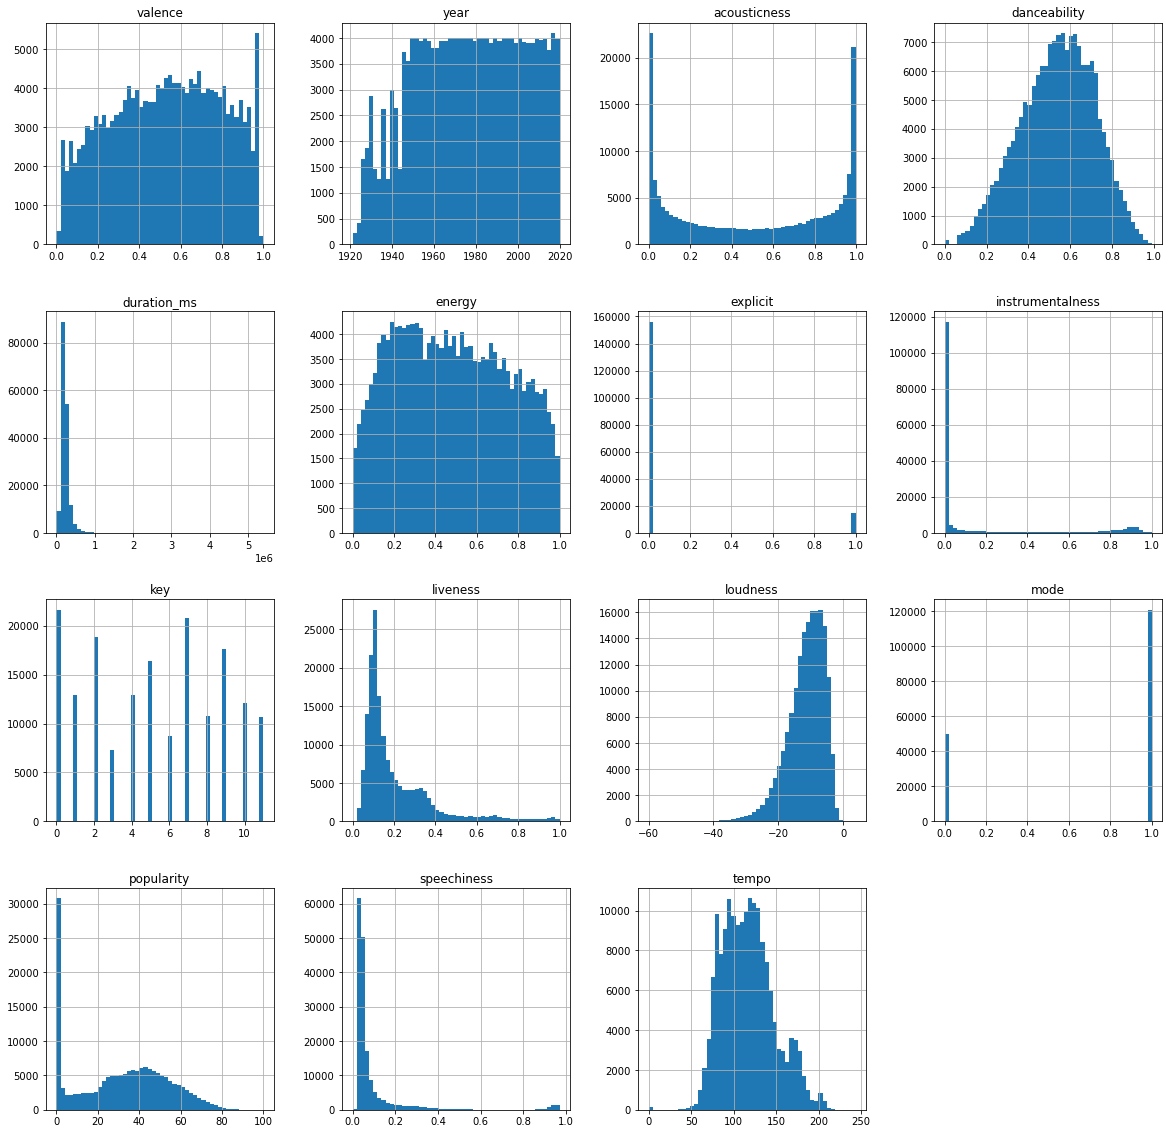

<Figure size 432x288 with 0 Axes>

In [ ]:
df.hist(bins=50, figsize=(20,20))
plt.show()
sns.despine()

Creating a correlation Matrix between all the features, using pearson method. Pay attention to the high correlation between popularity and year.

Index(['valence', 'year', 'acousticness', 'artists', 'danceability',
       'duration_ms', 'energy', 'explicit', 'id', 'instrumentalness', 'key',
       'liveness', 'loudness', 'mode', 'name', 'popularity', 'release_date',
       'speechiness', 'tempo'],
      dtype='object')

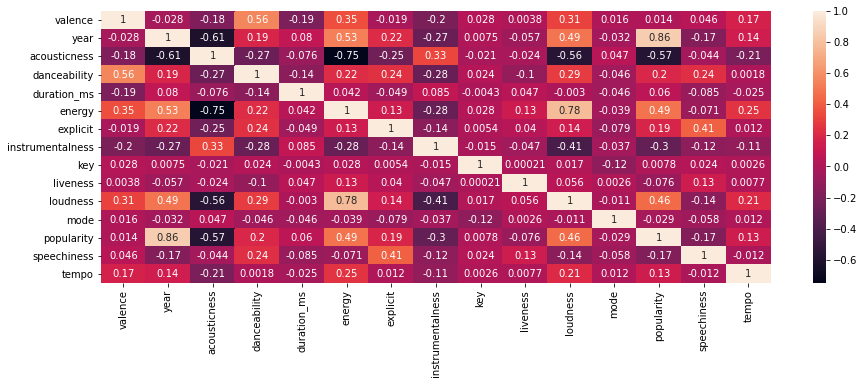

In [ ]:
corr = df.corr(method='pearson') 
plt.figure(figsize=(15,5))
sns.heatmap(corr, annot=True)
df.columns

As we are going to predict the popularity, let's have a look at some simple statistics about that.

In [ ]:
df['popularity'].describe()

count    170653.000000
mean         31.431794
std          21.826615
min           0.000000
25%          11.000000
50%          33.000000
75%          48.000000
max         100.000000
Name: popularity, dtype: float64

The most linear correlated features to *popularity* are:

In [ ]:
series = np.abs(corr['popularity']).sort_values(ascending=False)
#print('The most linear correlated features to POPULARITY are:')
for i, row in enumerate(series):
    if 0.19 < row < 1:
      print(f'{series.index[i]:17} --> {row: .2f} (abs)')

year              -->  0.86 (abs)
acousticness      -->  0.57 (abs)
energy            -->  0.49 (abs)
loudness          -->  0.46 (abs)
instrumentalness  -->  0.30 (abs)
danceability      -->  0.20 (abs)
explicit          -->  0.19 (abs)


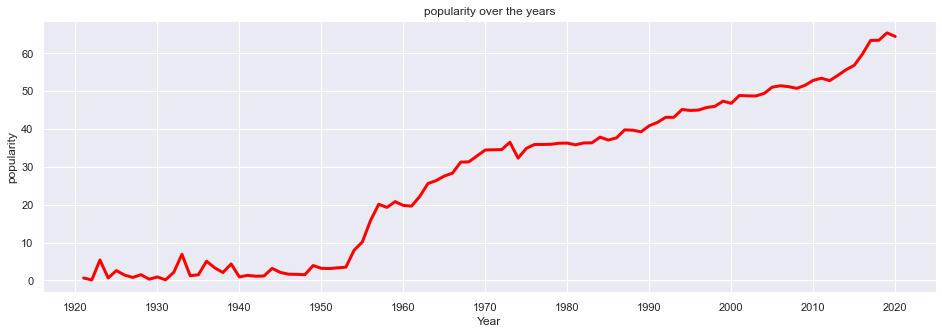

In [ ]:
plt.figure(figsize=(16, 5))
sns.set(style="darkgrid")
year_grp = df.groupby(['year'], as_index= False)
popularity_track = year_grp[['id', 'popularity']].mean()
graph = plt.subplot()
graph.plot(popularity_track.year, popularity_track.popularity, color='red', linewidth=3,)
graph.set_title('popularity over the years')
graph.set_ylabel('popularity')
graph.set_xlabel('Year')
graph.set_xticks(range(1920, 2021, 10))
plt.show()

Text(0.5, 0, 'Year')

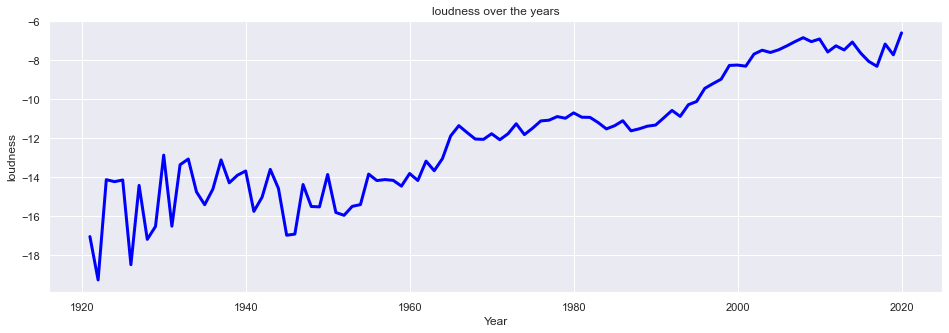

In [ ]:
plt.figure(figsize=(16, 5))
sns.set(style="darkgrid")
loudness_track = year_grp[['id', 'loudness']].mean()
ax = plt.subplot()
ax.plot(loudness_track.year, loudness_track.loudness, color='blue', linewidth=3,)
ax.set_title('loudness over the years')
ax.set_ylabel('loudness')
ax.set_xlabel('Year')

Text(0.5, 0, 'Year')

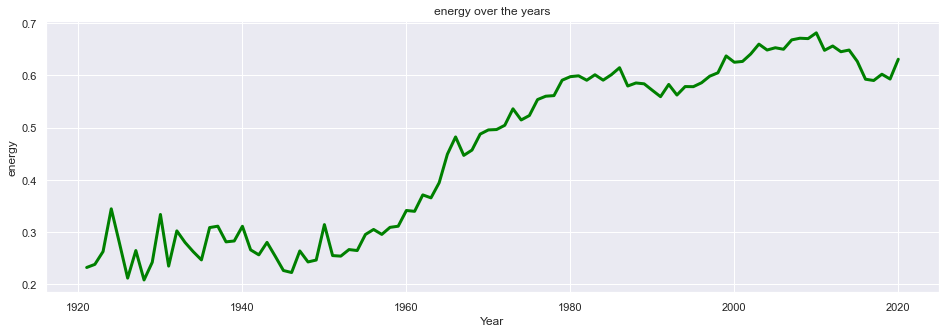

In [ ]:
plt.figure(figsize=(16, 5))
sns.set(style="darkgrid")
energy_track = year_grp[['id', 'energy']].mean()
ax = plt.subplot()
ax.plot(energy_track.year, energy_track.energy, color='green', linewidth=3,)
ax.set_title('energy over the years')
ax.set_ylabel('energy')
ax.set_xlabel('Year')

Let's now briefly look at the main characteristics

### Artists

In [ ]:
print('Total artists:')
print(df['artists'].nunique())

Total artists:
34088


Text(0.5, 0, 'Popularity')

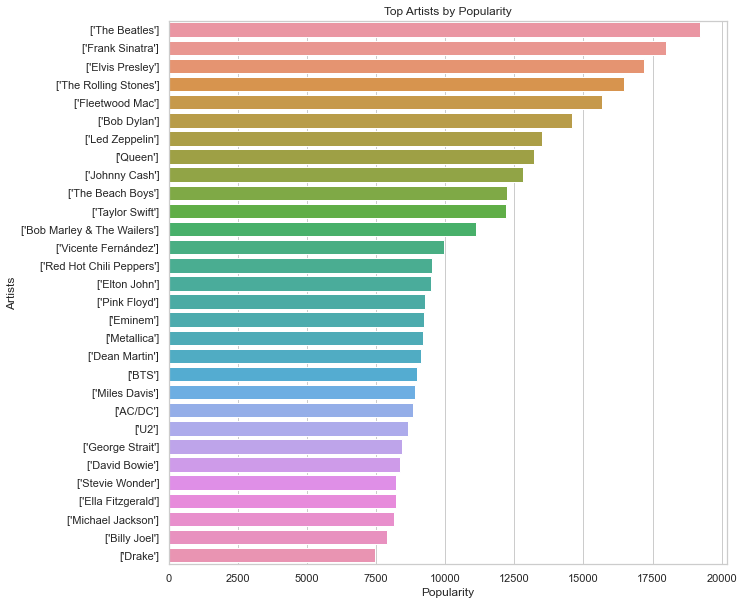

In [ ]:
plt.figure(figsize=(10, 10))
sns.set(style="whitegrid")
tmp = df.groupby("artists")["popularity"].sum().sort_values(ascending=False).head(30)
atmp = sns.barplot(x = tmp, y = tmp.index)
atmp.set_title('Top Artists by Popularity')
atmp.set_ylabel('Artists')
atmp.set_xlabel('Popularity')

Text(0.5, 0, 'Popularity')

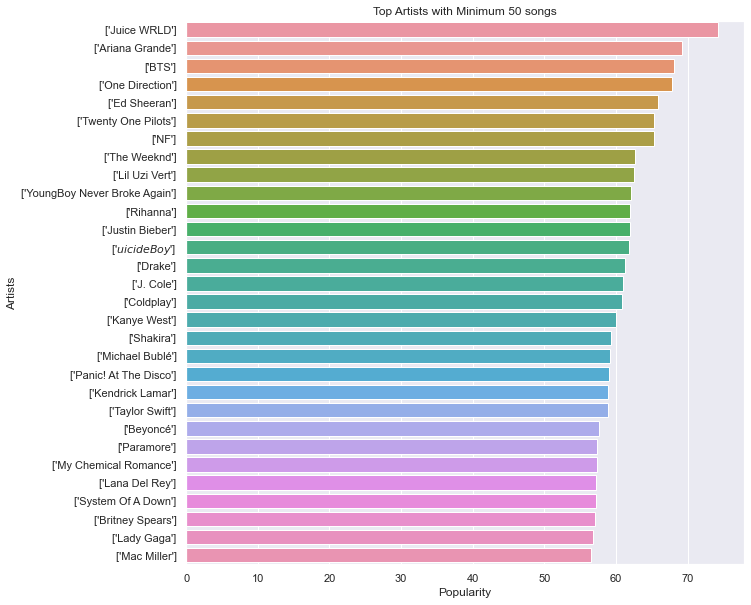

In [ ]:
# find artists with more than 50 tracks

df["popular_artists"] = df["artists"].map(df["artists"].value_counts()>50)
pop_arts  = df.groupby(["artists", "popular_artists"])["popularity"].mean().sort_values(ascending=False).reset_index(1)
df_pop_arts = pop_arts.loc[pop_arts["popular_artists"] == True,["popularity"]]

plt.figure(figsize=(10, 10))
sns.set(style="darkgrid")
tmp = df_pop_arts.groupby("artists")["popularity"].mean().sort_values(ascending=False).head(30)
atmp = sns.barplot(x = tmp, y = tmp.index)
atmp.set_title('Top Artists with Minimum 50 songs')
atmp.set_ylabel('Artists')
atmp.set_xlabel('Popularity')

## Acousticness

Describing the acousticness column

In [ ]:
df["acousticness"].describe()

count    170653.000000
mean          0.502115
std           0.376032
min           0.000000
25%           0.102000
50%           0.516000
75%           0.893000
max           0.996000
Name: acousticness, dtype: float64

Looking at some interesting details about this feature

Text(0.5, 0, 'acousticness')

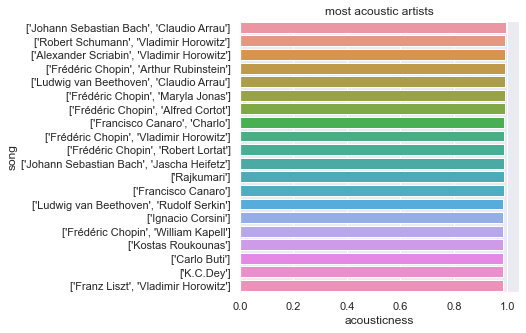

In [ ]:
df["energetic_artists"] = df["artists"].map(df["artists"].value_counts()>50)
enr_arts  = df.groupby(["artists", "energetic_artists"])["acousticness"].mean().sort_values(ascending=False).reset_index(1)
df_enr_arts = enr_arts.loc[enr_arts["energetic_artists"] == True,["acousticness"]]

plt.figure(figsize=(5, 5))
sns.set(style="darkgrid")
tmp = df_enr_arts.groupby("artists")["acousticness"].mean().sort_values(ascending=False).head(20)
atmp = sns.barplot(x = tmp, y = tmp.index)
atmp.set_title('most acoustic artists')
atmp.set_ylabel('song')
atmp.set_xlabel('acousticness')

Text(0.5, 0, 'acousticness')

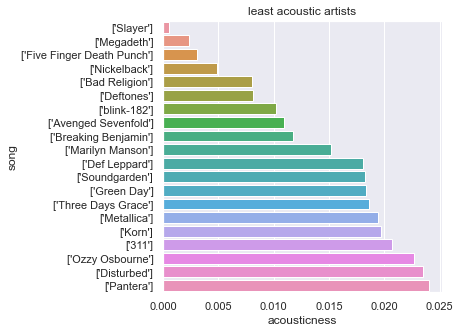

In [ ]:
df["energetic_artists"] = df["artists"].map(df["artists"].value_counts()>50)
enr_arts  = df.groupby(["artists", "energetic_artists"])["acousticness"].mean().sort_values(ascending=False).reset_index(1)
df_enr_arts = enr_arts.loc[enr_arts["energetic_artists"] == True,["acousticness"]]

plt.figure(figsize=(5, 5))
sns.set(style="darkgrid")
tmp = df_enr_arts.groupby("artists")["acousticness"].mean().sort_values(ascending=True).head(20)
atmp = sns.barplot(x = tmp, y = tmp.index)
atmp.set_title('least acoustic artists')
atmp.set_ylabel('song')
atmp.set_xlabel('acousticness')

As shown in the following diagram, the majority of tracks have an acousticness close to 0 or 1

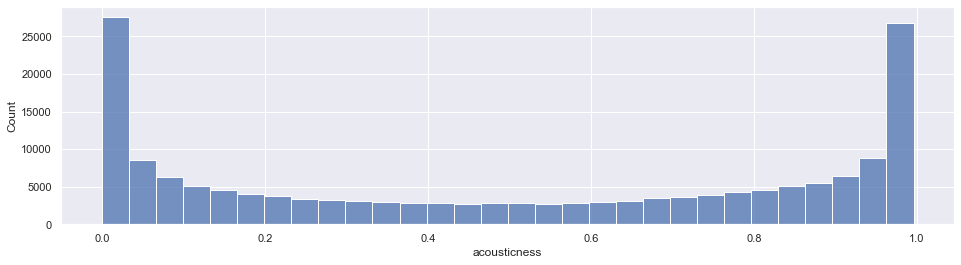

In [ ]:
fig, ax = plt.subplots(figsize=(16, 4))
sns.histplot(df['acousticness'], kde=False, bins=30)
plt.show()

This one chart represents the relationship between mean popularity and acousticness. As a conclusion, the more acoustic a track is, the less its mean popularity.

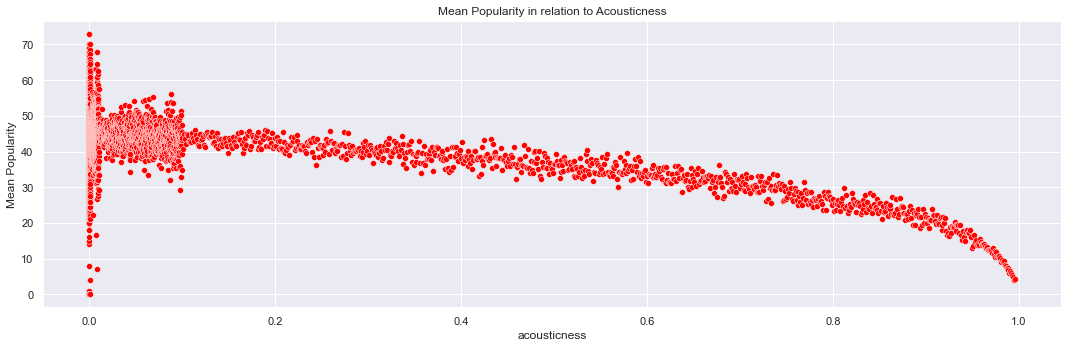

In [ ]:
fig, ax = plt.subplots(figsize=(15, 5))
ax1 =  df.groupby('acousticness')['popularity'].mean().to_frame().reset_index()
ax = sns.scatterplot(x = ax1['acousticness'], y = ax1['popularity'], color='red', ax=ax)
ax.set_title('Mean Popularity in relation to Acousticness')
ax.set_ylabel('Mean Popularity', fontsize=12)
plt.tight_layout()
plt.show()

## Energy

First of all, the column description

In [ ]:
df["energy"].describe()

count    170653.000000
mean          0.482389
std           0.267646
min           0.000000
25%           0.255000
50%           0.471000
75%           0.703000
max           1.000000
Name: energy, dtype: float64

Let's explore some facts using this feature

Text(0.5, 0, 'energy')

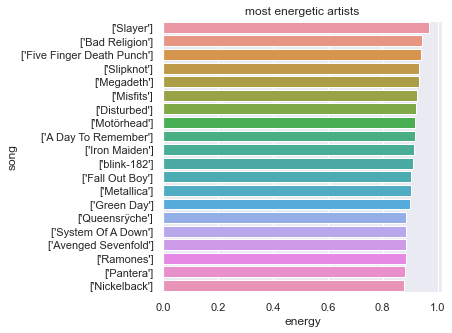

In [ ]:
df["energetic_artists"] = df["artists"].map(df["artists"].value_counts()>50)
enr_arts  = df.groupby(["artists", "energetic_artists"])["energy"].mean().sort_values(ascending=False).reset_index(1)
df_enr_arts = enr_arts.loc[enr_arts["energetic_artists"] == True,["energy"]]

plt.figure(figsize=(5, 5))
sns.set(style="darkgrid")
tmp = df_enr_arts.groupby("artists")["energy"].mean().sort_values(ascending=False).head(20)
atmp = sns.barplot(x = tmp, y = tmp.index)
atmp.set_title('most energetic artists')
atmp.set_ylabel('song')
atmp.set_xlabel('energy')

Text(0.5, 0, 'energy')

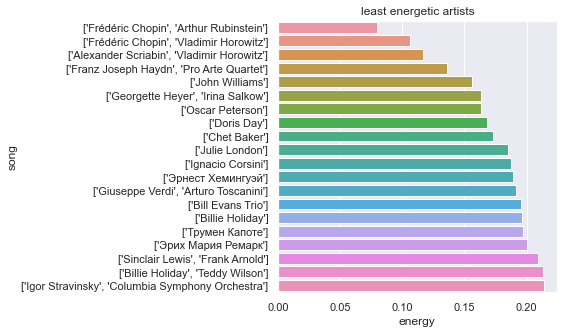

In [ ]:
df["energetic_artists"] = df["artists"].map(df["artists"].value_counts()>100)
enr_arts  = df.groupby(["artists", "energetic_artists"])["energy"].mean().sort_values(ascending=False).reset_index(1)
df_enr_arts = enr_arts.loc[enr_arts["energetic_artists"] == True,["energy"]]

plt.figure(figsize=(5, 5))
sns.set(style="darkgrid")
tmp = df_enr_arts.groupby("artists")["energy"].mean().sort_values(ascending=True).head(20)
atmp = sns.barplot(x = tmp, y = tmp.index)
atmp.set_title('least energetic artists')
atmp.set_ylabel('song')
atmp.set_xlabel('energy')

Now a nice plot, visualizing the relationship between energy and the target feature, which is popularity.

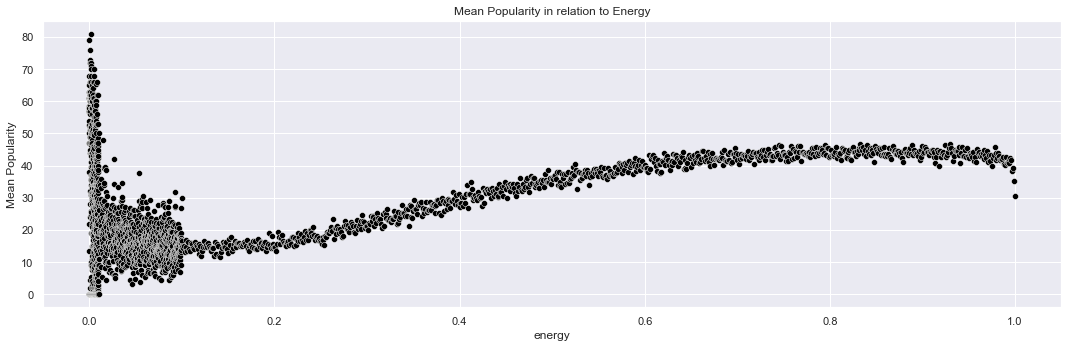

In [ ]:
fig, ax = plt.subplots(figsize=(15, 5))
ax1 =  df.groupby('energy')['popularity'].mean().to_frame().reset_index()
ax = sns.scatterplot(x = ax1['energy'], y = ax1['popularity'], color='black', ax=ax)
ax.set_title('Mean Popularity in relation to Energy')
ax.set_ylabel('Mean Popularity', fontsize=12)
plt.tight_layout()
plt.show()

## Loudness

In [ ]:
df['loudness'].describe()

count    170653.000000
mean        -11.467990
std           5.697943
min         -60.000000
25%         -14.615000
50%         -10.580000
75%          -7.183000
max           3.855000
Name: loudness, dtype: float64

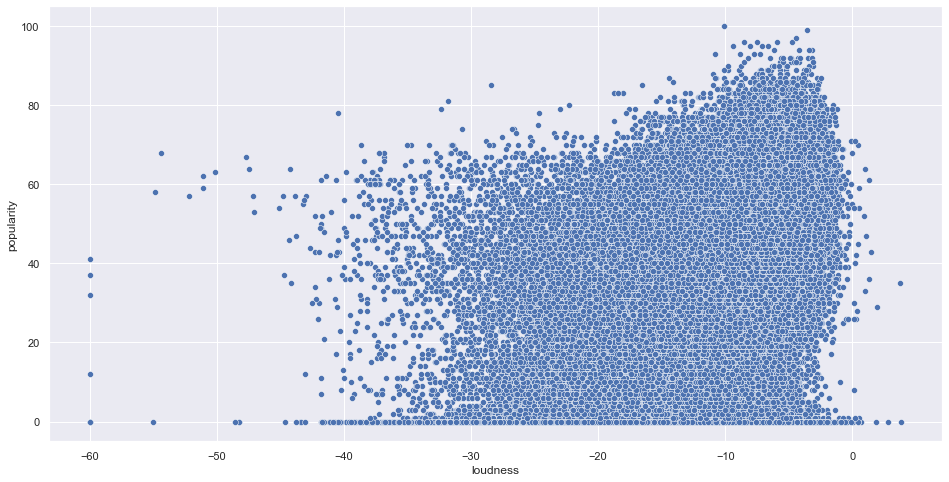

In [ ]:
plt.figure(figsize=(16, 8))
ax = sns.scatterplot(x=df['loudness'],y=df["popularity"],data=df)

Text(0.5, 0, 'popularity')

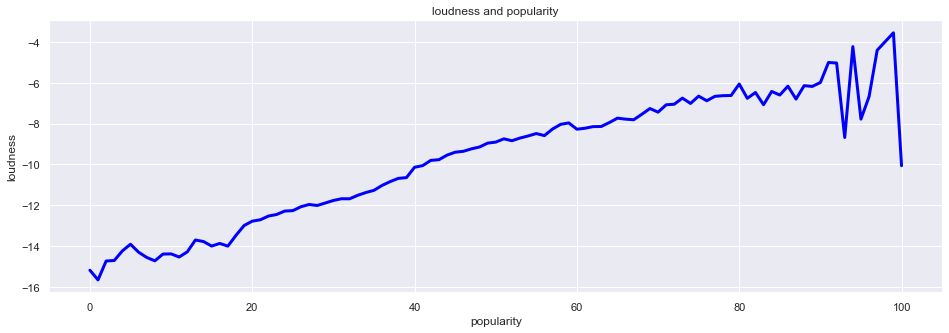

In [ ]:
plt.figure(figsize=(16, 5))
sns.set(style="darkgrid")
loud_grp = df.groupby(['popularity'], as_index= False)
loudness_track = loud_grp[['id', 'loudness']].mean()
ax = plt.subplot()
ax.plot(loudness_track.popularity, loudness_track.loudness, color='blue', linewidth=3,)
ax.set_title('loudness and popularity')
ax.set_ylabel('loudness')
ax.set_xlabel('popularity')

## Instrumentalness

It indicates the probabality of a track being instrumental (containing no vocals)

In [ ]:
df['instrumentalness'].describe()

count    170653.000000
mean          0.167010
std           0.313475
min           0.000000
25%           0.000000
50%           0.000216
75%           0.102000
max           1.000000
Name: instrumentalness, dtype: float64

Some interesting facts:

Text(0.5, 0, 'instrumentalness')

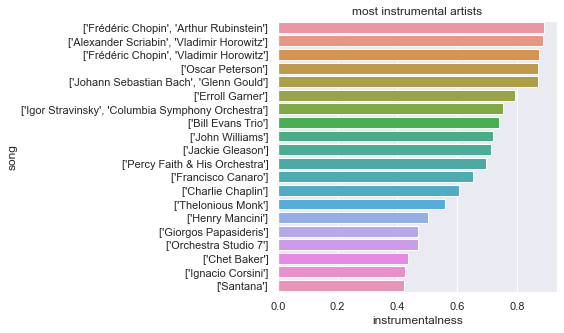

In [ ]:
df["energetic_artists"] = df["artists"].map(df["artists"].value_counts()>100)
enr_arts  = df.groupby(["artists", "energetic_artists"])["instrumentalness"].mean().sort_values(ascending=False).reset_index(1)
df_enr_arts = enr_arts.loc[enr_arts["energetic_artists"] == True,["instrumentalness"]]

plt.figure(figsize=(5, 5))
sns.set(style="darkgrid")
tmp = df_enr_arts.groupby("artists")["instrumentalness"].mean().sort_values(ascending=False).head(20)
atmp = sns.barplot(x = tmp, y = tmp.index)
atmp.set_title('most instrumental artists')
atmp.set_ylabel('song')
atmp.set_xlabel('instrumentalness')

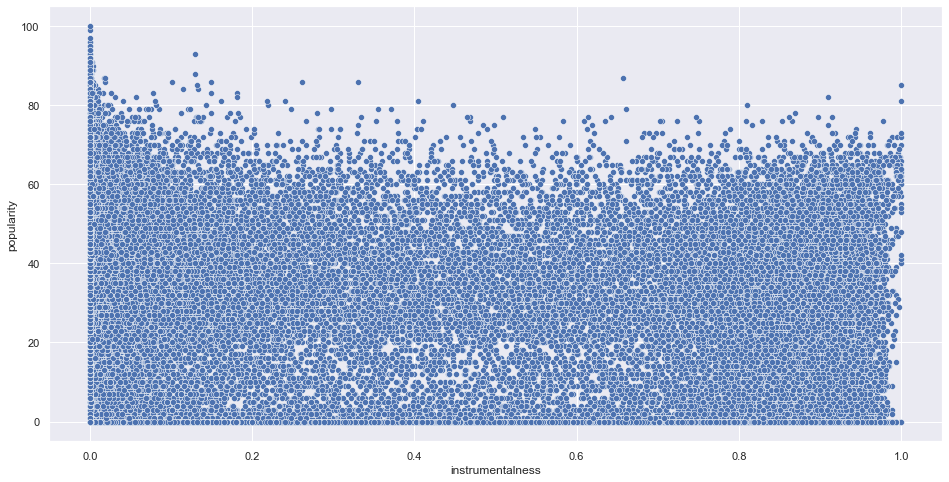

In [ ]:
plt.figure(figsize=(16, 8))
ax = sns.scatterplot(x=df['instrumentalness'],y=df["popularity"],data=df)

Correlation of instrumentalness and mean popularity

Text(0.5, 0, 'Mean popularity')

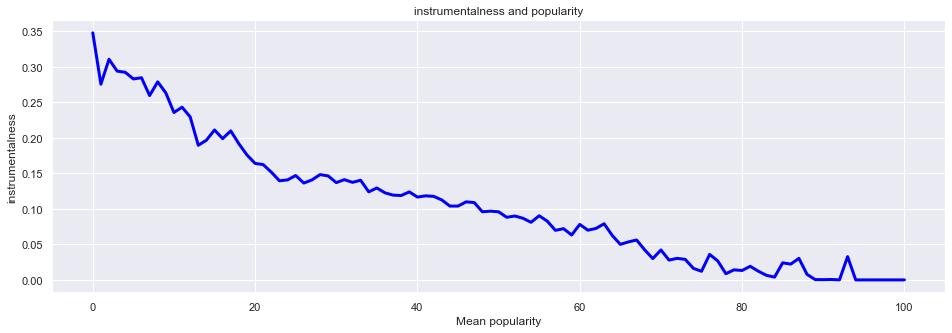

In [ ]:
plt.figure(figsize=(16, 5))
sns.set(style="darkgrid")
loud_grp = df.groupby(['popularity'], as_index= False)
loudness_track = loud_grp[['id', 'instrumentalness']].mean()
ax = plt.subplot()
ax.plot(loudness_track.popularity, loudness_track.instrumentalness, color='blue', linewidth=3,)
ax.set_title('instrumentalness and popularity')
ax.set_ylabel('instrumentalness')
ax.set_xlabel('Mean popularity')

# Preparing the data

We will need to consider only the relevant features as defined below 

In [ ]:
rl = ["artists","acousticness","energy","loudness","instrumentalness","year" ]
relevant = df[rl]

Splitting the dataset for Training and Testing. The size of test subset will be 0.1. 

In [ ]:
from sklearn.model_selection import train_test_split
y = df['popularity']
X = relevant

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size= 0.1, random_state=42)


As we know, the artist plays a huge role on popularity of a track. 
That's why we used the so called Target Encoding approach and replaced the artists with the value of their mean popularity, to help out building a better model. Here is the artists transformer:

In [ ]:

  """ The transformer recives a Data Frame with a feature 'artists' of dtype object
      and convert the feature to a float value as follows:
      1. Replace the data with the artists mean popularity
      2. Replace values where artists appear less than MinCnt with y.mean()
      3. Replace values where artists appear more than MaxCnt with 0
      
      PARAMETERS:
      ----------
      MinCnt (int): Minimal treshold of artisits apear in dataset, default = 3
      MaxCnt (int): Maximal treshold of artisits apear in dataset, default = 600

      RERTURN:
      ----------
      A DataFrame with converted artists str feature to ordinal floats
  """


class ArtistsTransformer():
    def __init__(self, MinCnt = 3.0, MaxCnt = 600.0):
      self.MinCnt = MinCnt
      self.MaxCnt = MaxCnt
      self.artists_df = None
  
    def fit (self, X, y):
      self.artists_df =  y.groupby(X.artists).agg(['mean', 'count'])
      self.artists_df.loc['unknown'] = [y.mean(), 1]
      self.artists_df.loc[self.artists_df['count'] <= self.MinCnt, 'mean'] = y.mean()
      self.artists_df.loc[self.artists_df['count'] >= self.MaxCnt, 'mean'] = 0
      return self

    def transform(self, X, y=None):
      X['artists'] = np.where(X['artists'].isin(self.artists_df.index), X['artists'], 'unknown')
      X['artists'] = X['artists'].map(self.artists_df['mean'])
      return X

In [ ]:
artists_transformer = ArtistsTransformer(MinCnt=2)
X_train = artists_transformer.fit(X_train, y_train).transform(X_train, y_train)
X_test = artists_transformer.transform(X_test, y_test)

Target Scaling

In [ ]:
y_train = y_train / 100
y_test = y_test / 100

## Standarizing data

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
cols = ['artists','loudness','year']
X_train[cols] = scaler.fit_transform(X_train[cols])
X_test[cols] = scaler.fit_transform(X_test[cols])

In [ ]:
X_train.head()

,artists,acousticness,energy,loudness,instrumentalness,year
80945,0.128631,0.8420,0.1980,0.761005,0.000000,0.292929
101716,0.266183,0.0225,0.8350,0.800705,0.000114,0.434343
61142,0.545567,0.3480,0.3370,0.789038,0.000003,0.787879
146102,0.004582,0.9940,0.1340,0.598230,0.869000,0.313131
21003,0.385503,0.8990,0.0913,0.663895,0.000004,0.676768


In [ ]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 152918 entries, 80945 to 121958
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   artists           152918 non-null  float64
 1   acousticness      152918 non-null  float64
 2   energy            152918 non-null  float64
 3   loudness          152918 non-null  float64
 4   instrumentalness  152918 non-null  float64
 5   year              152918 non-null  float64
dtypes: float64(6)
memory usage: 8.2 MB


In [ ]:
y_train.head()

5939      0.36
50773     0.29
109589    0.06
8094      0.02
110298    0.25
Name: popularity, dtype: float64

In [ ]:
from sklearn.utils import shuffle
X_train, y_train = shuffle(X_train, y_train)

## KNN Model

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
KNN = KNeighborsRegressor( n_neighbors=60)
KNN.fit(X_train,y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=60, p=2,
                    weights='uniform')

In [ ]:
KNN_pred = KNN.predict(X_test)

In [ ]:
KNN_score = KNN.score(X_test, y_test, sample_weight=None)
KNN_score

0.8106490058347626

In [ ]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test, KNN_pred)

0.063886292743217

In [ ]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, KNN_pred)

0.007992248154251598

In [ ]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error
RMSE_train, RMSE_test = [], []
  
for i in range(5,201,5):
    knn = KNeighborsRegressor(n_neighbors=i)
    knn.fit(X_train,y_train)
    y_train_pred = knn.predict(X_train)
    knn_train_rmse = np.sqrt(mse(y_train, y_train_pred))
    RMSE_train.append(knn_train_rmse.round(3))
    y_test_pred = knn.predict(X_test)
    knn_test_rmse = np.sqrt(mse(y_test, y_test_pred))
    RMSE_test.append(knn_test_rmse.round(3))


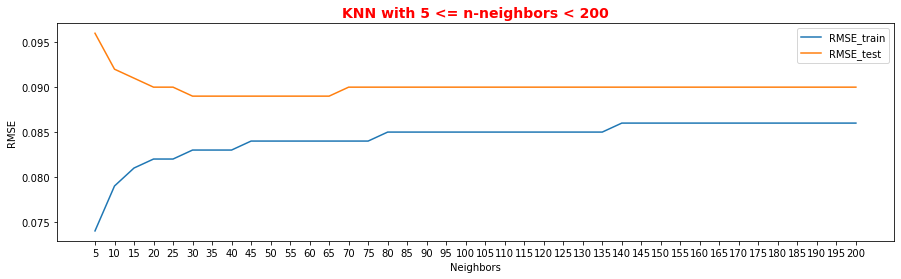

In [ ]:
fig, ax = plt.subplots(figsize=(15,4))
x = np.arange(5, 201, 5)
ax = sns.lineplot(x=x, y=RMSE_train)
sns.lineplot(x=x, y=RMSE_test, ax=ax)
ax.legend(labels=['RMSE_train', 'RMSE_test'], bbox_to_anchor=(1, 1))
ax.set_xlabel('Neighbors')
ax.set_ylabel('RMSE')
ax.set_xticks(np.arange(5,201,5))
ax.set_title('KNN with 5 <= n-neighbors < 200', c='r', fontdict={ 'fontsize':14, 'weight':'bold'})
plt.show()

## Random Forest Regression Model

In [ ]:
from sklearn.ensemble import RandomForestRegressor
forest_model = RandomForestRegressor(n_estimators=150, random_state=1)
forest_model.fit(X_train, y_train)


RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=150, n_jobs=None, oob_score=False,
                      random_state=1, verbose=0, warm_start=False)

In [ ]:
forest_predict = forest_model.predict(X_test)

In [ ]:
score = forest_model.score(X_test, y_test, sample_weight=None)
score

0.8079195715224367

In [ ]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test, forest_predict)

0.06913581175213379

In [ ]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, forest_predict)

0.00897302574588201

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
mse = mean_squared_error
forest_RMSE_train, forest_RMSE_test = [], []

for i in range(5, 301, 5):
    forest_model = RandomForestRegressor(n_estimators=i, random_state=1)
    forest_model.fit(X_train, y_train)
    y_train_pred = forest_model.predict(X_train)
    train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
    forest_RMSE_train.append(train_rmse.round(3))
    y_test_pred = forest_model.predict(X_test)
    test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
    forest_RMSE_test.append(test_rmse.round(3))

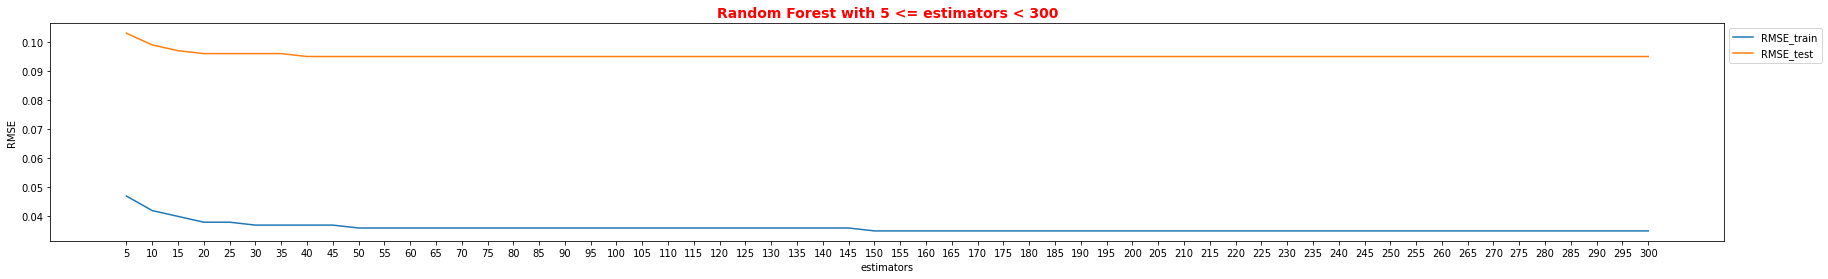

In [ ]:
fig, ax = plt.subplots(figsize=(30,4))
x = np.arange(5, 301, 5)
ax = sns.lineplot(x=x, y= forest_RMSE_train)
sns.lineplot(x=x, y= forest_RMSE_test, ax=ax)
ax.legend(labels=['RMSE_train', 'RMSE_test'], bbox_to_anchor=(1, 1))
ax.set_xlabel('estimators')
ax.set_ylabel('RMSE')
ax.set_xticks(np.arange(5,301,5))
ax.set_title('Random Forest with 5 <= estimators < 300', c='r', fontdict={ 'fontsize':14, 'weight':'bold'})
plt.show()